##  Building a Medical Assistant Using Gemini Pro Vision

### Introduction   

Today, we live in a world where AI is used in almost every use case. From banking to healthcare applications, AI has its foot. After knowing the possibilities of ChatGPT, several other companies have started putting their effort into building a better transformer with improved accuracy. In this article, we will see how we can use Google’s Gemini Pro model to analyze an image and give a medical diagnosis.

---  
Source:   
* [Analytics Vidhya Blog](https://www.analyticsvidhya.com/blog/2024/05/medical-assistant-using-gemini-pro-vision/)  

History:  
* 25.02.25 dbe --- v1 - initial draft

---


In [ ]:
google_api_key='YOUR_API_KEY'

We will give the below prompt to our model:

---

"""
    You are a domain expert in medical image analysis. You are tasked with
    examining medical images for a renowned hospital.
    Your expertise will help in identifying or
    discovering any anomalies, diseases, conditions or
    any health issues that might be present in the image.
    
    Your key responsibilites:
    1. Detailed Analysis : Scrutinize and thoroughly examine each image,
    focusing on finding any abnormalities.
    2. Analysis Report : Document all the findings and
    clearly articulate them in a structured format.
    3. Recommendations : Basis the analysis, suggest remedies,
    tests or treatments as applicable.
    4. Treatments : If applicable, lay out detailed treatments
    which can help in faster recovery.
    
    Important Notes to remember:
    1. Scope of response : Only respond if the image pertains to
    human health issues.
    2. Clarity of image : In case the image is unclear,
    note that certain aspects are
    'Unable to be correctly determined based on the uploaded image'
    3. Disclaimer : Accompany your analysis with the disclaimer:
    "Consult with a Doctor before making any decisions."
    4. Your insights are invaluable in guiding clinical decisions.
    Please proceed with the analysis, adhering to the
    structured approach outlined above.
    
    Please provide the final response with these 4 headings :
    Detailed Analysis, Analysis Report, Recommendations and Treatments
    
"""

xxxx

In [ ]:
import streamlit as st
from pathlib import Path
import google.generativeai as genai
from google_api_key import google_api_key
## Streamlit App

genai.configure(api_key=google_api_key)

# https://aistudio.google.com/app/u/1/prompts/recipe-creator
# Set up the model
generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 0,
  "max_output_tokens": 8192,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

system_prompts = [
    """
    You are a domain expert in medical image analysis. You are tasked with
    examining medical images for a renowned hospital.
    Your expertise will help in identifying or
    discovering any anomalies, diseases, conditions or
    any health issues that might be present in the image.

    Your key responsibilites:
    1. Detailed Analysis : Scrutinize and thoroughly examine each image,
    focusing on finding any abnormalities.
    2. Analysis Report : Document all the findings and
    clearly articulate them in a structured format.
    3. Recommendations : Basis the analysis, suggest remedies,
    tests or treatments as applicable.
    4. Treatments : If applicable, lay out detailed treatments
    which can help in faster recovery.

    Important Notes to remember:
    1. Scope of response : Only respond if the image pertains to
    human health issues.
    2. Clarity of image : In case the image is unclear,
    note that certain aspects are
    'Unable to be correctly determined based on the uploaded image'
    3. Disclaimer : Accompany your analysis with the disclaimer:
    "Consult with a Doctor before making any decisions."
    4. Your insights are invaluable in guiding clinical decisions.
    Please proceed with the analysis, adhering to the
    structured approach outlined above.

    Please provide the final response with these 4 headings :
    Detailed Analysis, Analysis Report, Recommendations and Treatments

"""
]

model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


st.set_page_config(page_title="Visual Medical Assistant", page_icon="🩺",
layout="wide")
st.title("Visual Medical Assistant 👨‍⚕️ 🩺 🏥")
st.subheader("An app to help with medical analysis using images")

file_uploaded = st.file_uploader('Upload the image for Analysis',
type=['png','jpg','jpeg'])

if file_uploaded:
    st.image(file_uploaded, width=200, caption='Uploaded Image')

submit=st.button("Generate Analysis")

if submit:

    image_data = file_uploaded.getvalue()

    image_parts = [
        {
            "mime_type" : "image/jpg",
            "data" : image_data
        }
    ]

#     making our prompt ready
    prompt_parts = [
        image_parts[0],
        system_prompts[0],
    ]

#     generate response

    response = model.generate_content(prompt_parts)
    if response:
        st.title('Detailed analysis based on the uploaded image')
        st.write(response.text)


Here is the line-by-line interpretation:

Line 1-4 -> We import the necessary libraries and the google_api_key.

On line 7 -> we must pass the API Key created in step 2.

Lines 11-35 -> Here, we are defining the Gemini model’s basic configuration and safety settings. Don’t worry; you can visit Google AI Studio and click on get code to get all these code snippets.

Lines 37-71 -> Here, we are defining our prompt for the model.

Lines 73-76 -> Here, we are initializing our Gemini model.

Lines 78-81 -> Here, we are showing some texts on streamlit app

Lines 83-87 -> Notice how we store the uploaded image in the file_uploaded variable. We allow ‘png’,’jpg’,’jpeg’ image types. So, the upload will fail if you provide anything else. If the image is successfully uploaded, we will display it on the browser.

Lines 89-113 -> We have created a submit button with the text “Generate Analysis.” Once we click on that, the actual magic will happen. We pass the image and the prompt to our Gemini model. The Gemini model will return the response back to us.

Then, we will display the response back on the browser.

---  
I have saved this file as app.py

### Seeing it in Action

We need to open the Python terminal and execute the following to invoke a streamlit app.

Make sure you change your directory to the same as app.py

```
streamlit run app.py
```



Output:

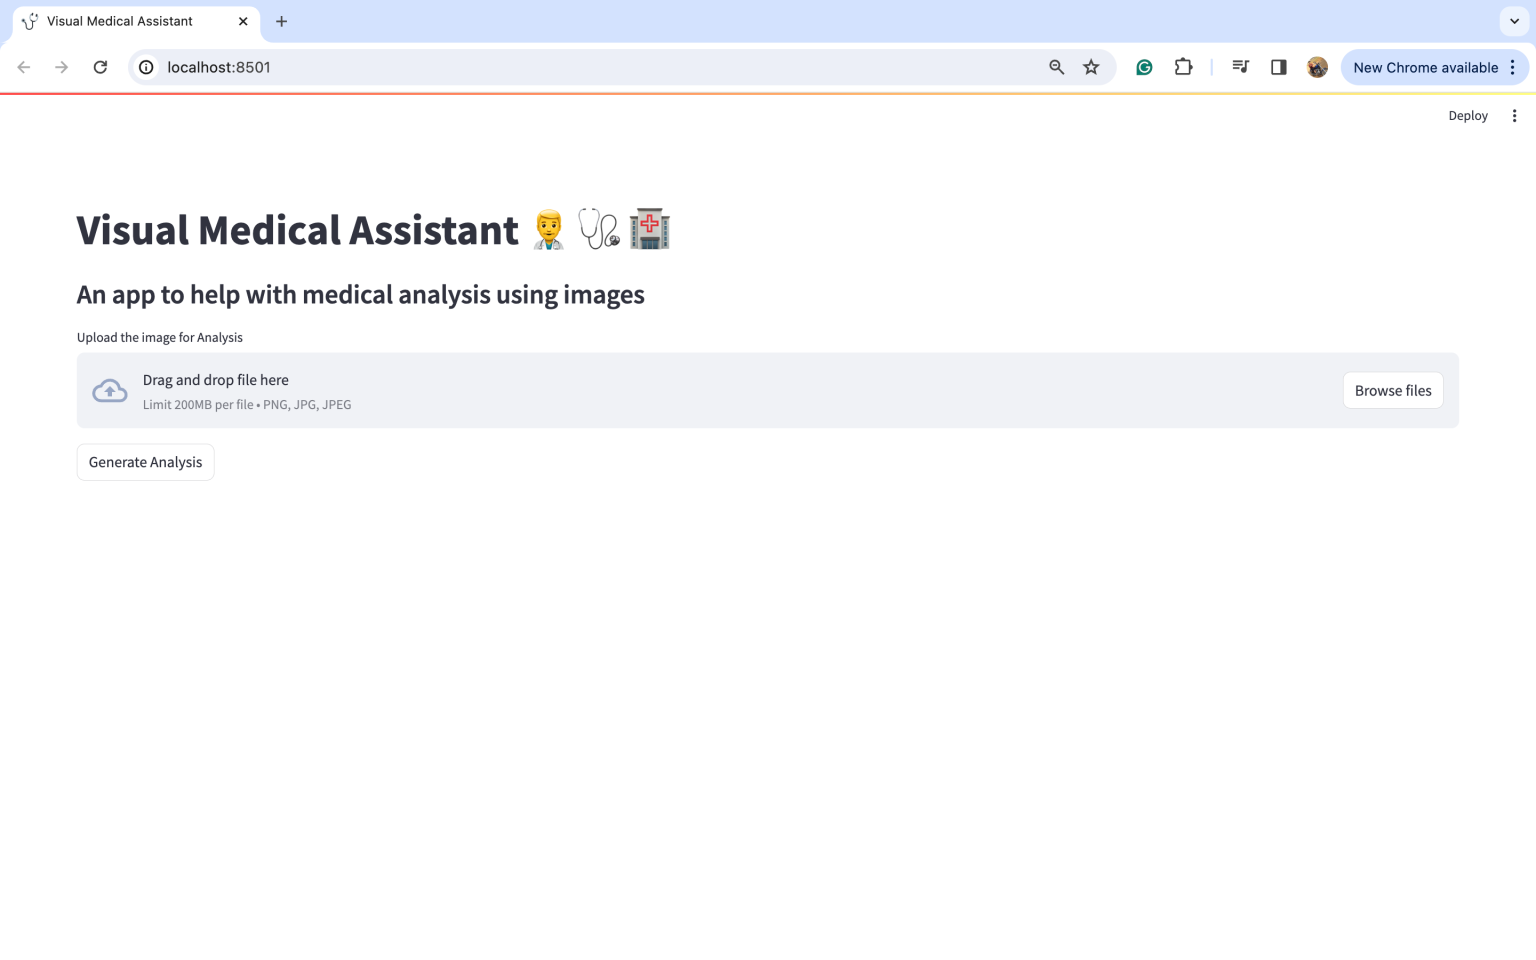

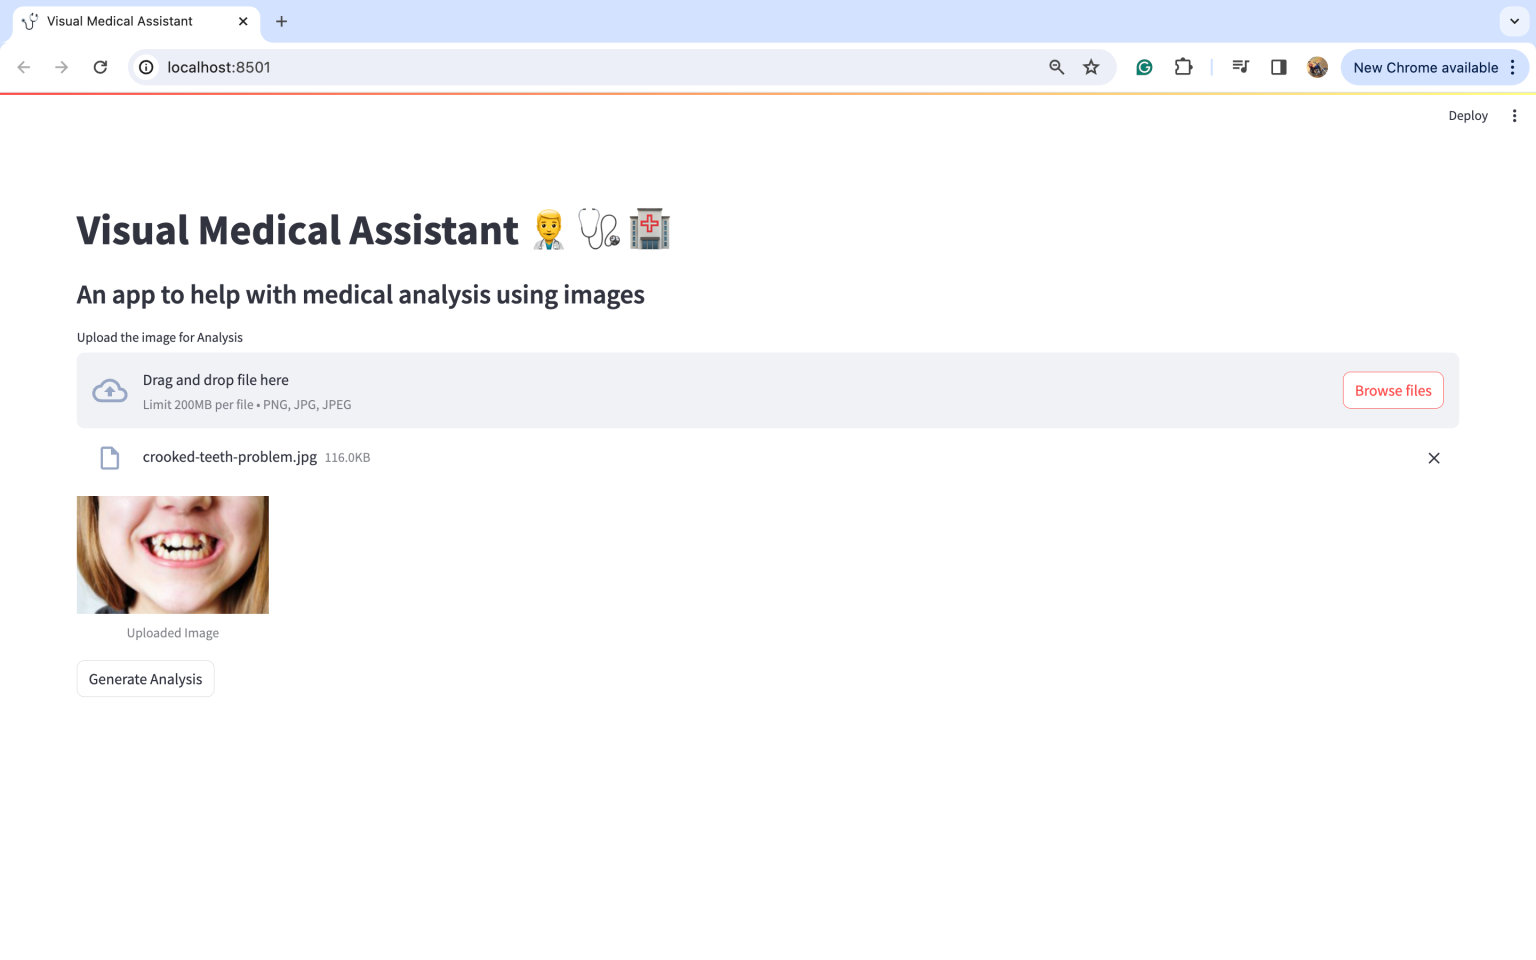

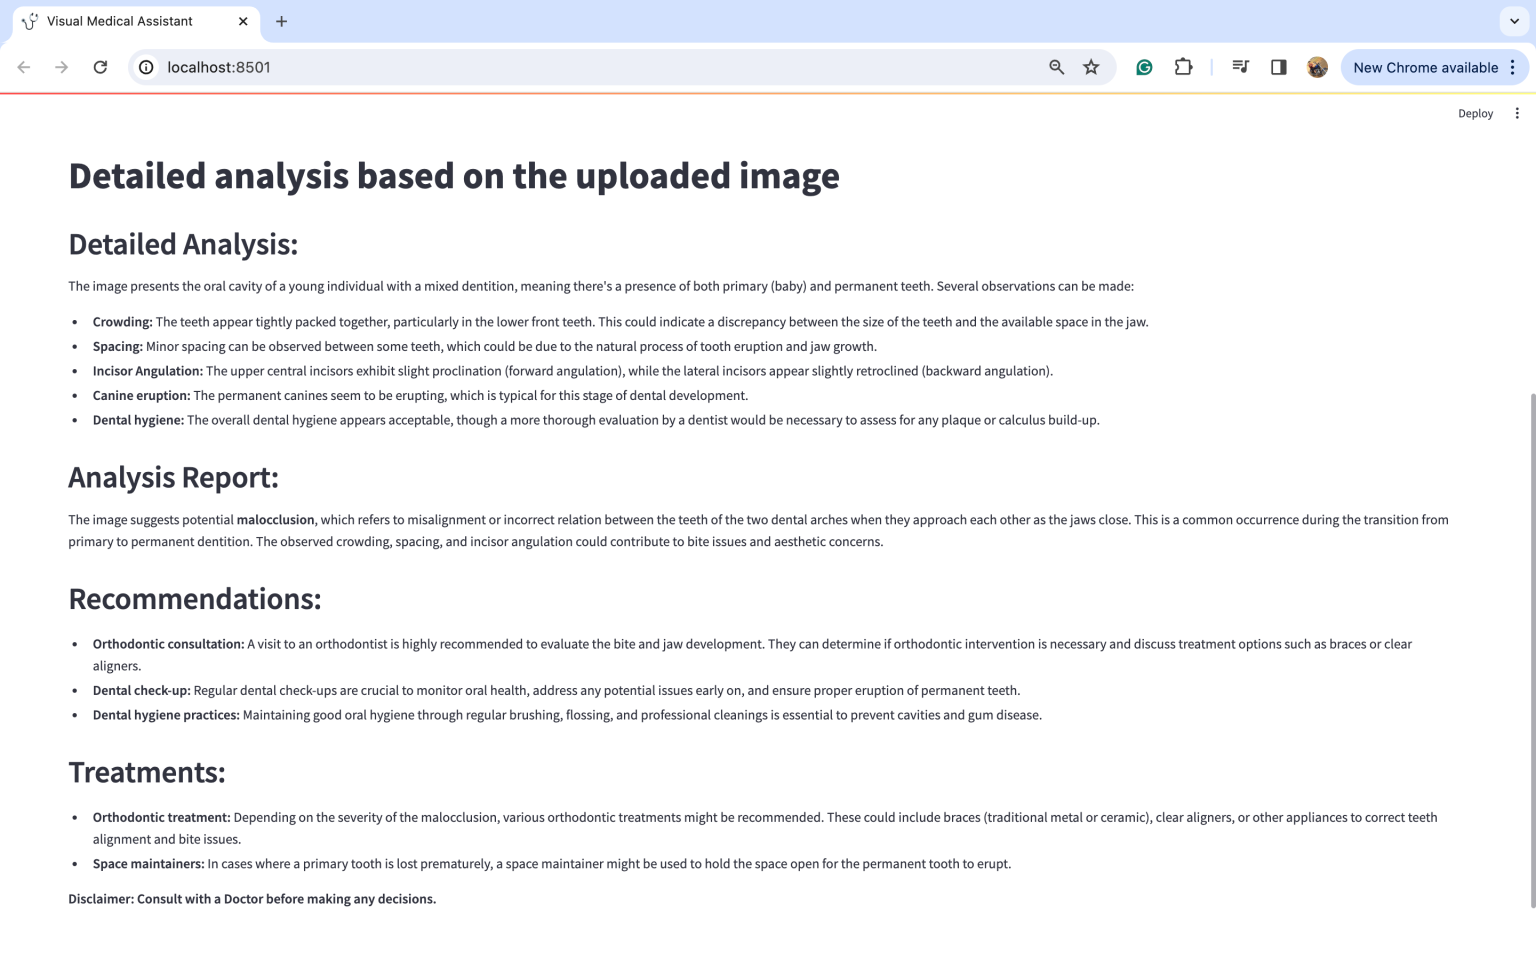